# DRAFT: Visualizing XVHLScaffold

This notebook uses GraphViz to visualize rows in the XVHLScaffold,
and demonstrate how the `swap()` function works.

In [1]:
import scaffold_graph_tests
import imp; imp.reload(scaffold_graph_tests)
from scaffold_graph_tests import *

## Row Swapping with Independent Nodes

This is one of the simplest possible examples.

When a node on either row is independent, it simply stays in place as the rows are swapped.

Note that nodes are _always_ independent of the rows above them, because edges in the scaffold always point downward.

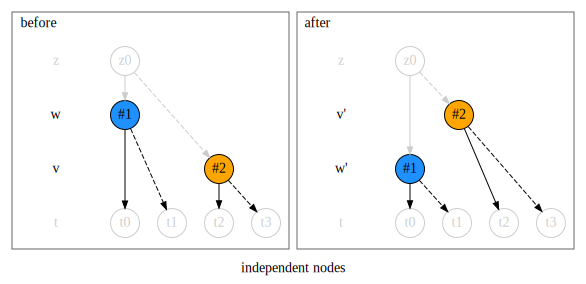

In [2]:
ite_scaffold("independent nodes",
    before = {
        'rw': [1], 'rv': [2],
        'ites': [[z0, 1, 2], [1, t0, t1], [2, t2, t3]]},
    after = {
        'rv': [2], 'rw': [1],
        'ites': [[z0, 1, 2], [1, t0, t1], [2, t2, t3]]})


Each node maintains a reference count. This includes an internal count of the number of incoming edges in the graph,
plus an external count for reference stored outside the graph (generally, a in a rust variable).

If a node's reference count is zero after its row is swapped, the node is removed from the graph, or "garbage collected".

For example, in the graph below, node `#1` is removed because it had no incoming references to begin with.
This causes the refcounts of `t0` and `#2` to decrease by 1, and so node `#2` is removed because its refcount is now 0.

It appears that node `t0` also has a refcount of 0, but it is not garbage collected because row `t` was not involved in the swap.

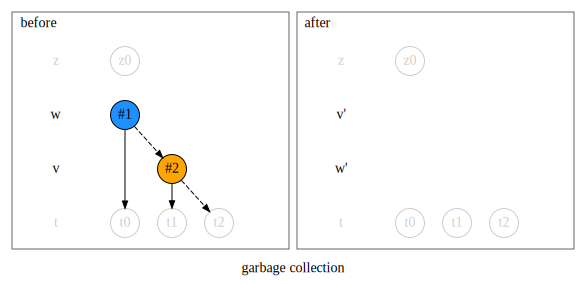

In [3]:
ite_scaffold("garbage collection",
    before = {
        'rw': [1], 'rv': [2],
        'ites': [[z0,un,un],[1, t0, 2], [2, t1, t2]]},
    after = {
        'rv': [], 'rw': [],
        'ites': [[z0,un,un],[t0,un,un],[t1,un,un],[t2,un,un]]})


## Row Swapping with Dependent Nodes

### Dependent on one side


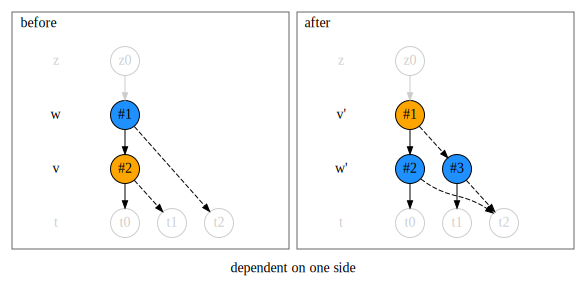

In [4]:
ite_scaffold("dependent on one side",
    before = {
        'rw': [1], 'rv': [2],
        'ites': [[z0, 1, un], [1, 2, t2], [2, t0, t1]]},
    after = {
        'rv': [1], 'rw': [-2, 3],
        'ites': [[z0, 1, un], [1, 2, 3], [2, t0, t2], [3, t1, t2]]})

Note that node `#1` has changed its color (branch variable), moving from row `w` to row `v'`, even as the rows swap.
This way, the graph can be changed without disturbing incoming edges from nodes higher in the graph (`z0`, for example).

It appears as if node `#2` has also switched colors, but the reason is completely different.
The only reference to this node was coming from `#1`. Once the rows swapped, that reference had to be removed (since
edges can only point downward), and replaced with a new reference to a node on row `w'`. Removing this edge dropped node `#1`'s
reference count 0, so it was immediately garbage collected and its slot was reused for a completely new node.


Suppose instead that there had been an extra link to `#2`:

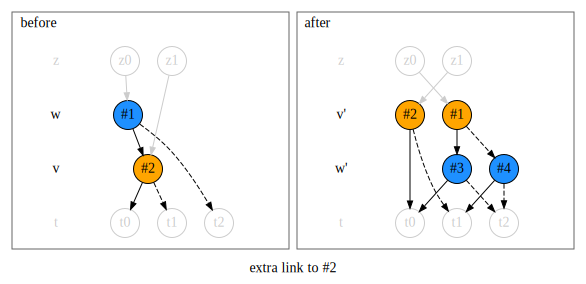

In [5]:
ite_scaffold("extra link to #2",
    before = {
        'rw': [1], 'rv': [2],
        'ites': [[z0, 1, un], [z1, 2, un], [1, 2, t2], [2, t0, t1]]},
    after = {
        'rv': [2, 1], 'rw': [3, 4],
        'ites': [[z1, 2, un], [z0, 1, un], [2, t0, t1], [1, 3, 4], [3, t0, t2], [4, t1, t2]]})

As before, node `#1` moved from row `w` to row `v'`, and two new nodes were created on row `w'`, but this time, `#2`
is left unchanged. Internally, its refcount still dropped by 1, but in terms of the graph itself, it is still
branching on variable `v`, with its `hi` and `lo` edges pointing at `t0` and `t1`, respectively.


### Dependent nodes on both sides

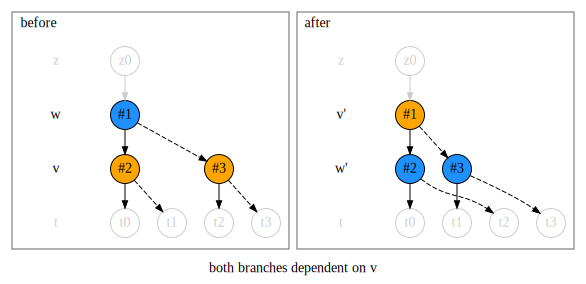

In [6]:
ite_scaffold("both branches dependent on v",
    before = {
        'rw': [1], 'rv': [2, 3],
        'ites': [[z0, 1, un], [1, 2, 3], [2, t0, t1], [3, t2, t3]]},
    after = {
        'rv': [1], 'rw': [-2, -3],
        'ites': [[z0, 1, un], [1, 2, 3], [2, t0, t2], [3, t1, t3]]})


TODO: dependent on both sides, with extra reference(s)

TODO: special case when one side collapses

TODO: show when a v-node would be deleted but there are references from outside row v


In [7]:
write_tests()